In [2]:
# ============================================
# 1. IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#4caf50"])


In [3]:
df = pd.read_csv("wfp_food_prices_mmr.csv")
df.head()


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,15/1/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,cereals and tubers,Rice (low quality),145,KG,actual,Retail,MMK,400.00,0.41
1,15/1/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,MMK,3636.36,3.74
2,15/1/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,miscellaneous food,Salt,185,KG,actual,Retail,MMK,242.42,0.25
3,15/1/2008,Kachin,Myitkyina,Wai Maw,1021,25.34,97.44,vegetables and fruits,Onions,173,KG,actual,Retail,MMK,969.70,1.00
4,15/1/2008,Magway,Magway,Magway,997,20.15,94.92,cereals and tubers,Potatoes,83,KG,actual,Retail,MMK,242.42,0.25


In [5]:
print("Shape:", df.shape)
df.info()
df.describe(include="all")


Shape: (38629, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38629 entries, 0 to 38628
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          38629 non-null  object 
 1   admin1        38629 non-null  object 
 2   admin2        38629 non-null  object 
 3   market        38629 non-null  object 
 4   market_id     38629 non-null  int64  
 5   latitude      38629 non-null  float64
 6   longitude     38629 non-null  float64
 7   category      38629 non-null  object 
 8   commodity     38629 non-null  object 
 9   commodity_id  38629 non-null  int64  
 10  unit          38629 non-null  object 
 11  priceflag     38629 non-null  object 
 12  pricetype     38629 non-null  object 
 13  currency      38629 non-null  object 
 14  price         38629 non-null  float64
 15  usdprice      38629 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 4.7+ MB


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
count,38629,38629,38629,38629,38629.000000,38629.000000,38629.000000,38629,38629,38629.000000,38629,38629,38629,38629,38629.000000,38629.000000
unique,212,15,50,264,NaN,NaN,NaN,7,24,NaN,5,1,2,1,NaN,NaN
top,15/2/2025,Rakhine,Sittwe,Lashio Market,NaN,NaN,NaN,cereals and tubers,Rice (low quality),NaN,KG,actual,Retail,MMK,NaN,NaN
freq,599,8429,3217,769,NaN,NaN,NaN,7352,6455,NaN,26718,38629,38559,38629,NaN,NaN
mean,NaN,NaN,NaN,NaN,3112.785757,21.647588,95.783267,NaN,NaN,227.645008,NaN,NaN,NaN,NaN,2313.075032,1.369383
std,NaN,NaN,NaN,NaN,2271.797854,2.773086,2.149460,NaN,NaN,122.033346,NaN,NaN,NaN,NaN,2659.601616,1.463716
min,NaN,NaN,NaN,NaN,977.000000,11.270000,92.200000,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,3.000000,0.002000
25%,NaN,NaN,NaN,NaN,1020.000000,20.290000,93.540000,NaN,NaN,145.000000,NaN,NaN,NaN,NaN,687.000000,0.480000
50%,NaN,NaN,NaN,NaN,3282.000000,21.630000,96.150000,NaN,NaN,185.000000,NaN,NaN,NaN,NaN,1515.150000,0.970000
75%,NaN,NaN,NaN,NaN,3344.000000,23.660000,97.630000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,2809.000000,1.650000


In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
numeric_cols = ['price', 'usdprice']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\nuwai\AppData\Local\Temp\ipykernel_11568\244531632.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [7]:
df['admin1'].value_counts()

admin1
Rakhine         8429
Shan (North)    7208
Kachin          6153
Chin            4096
Magway          3026
Sagaing         1763
Yangon          1608
Shan (South)    1476
Mandalay        1326
Mon             1128
Kayin            976
Tanintharyi      867
Kayah            404
Shan (East)      155
Bago (East)       14
Name: count, dtype: int64

In [5]:
text_cols = ['admin1','admin2','market','commodity','category','unit']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()


In [6]:
df.isna().sum()
df = df.drop_duplicates()


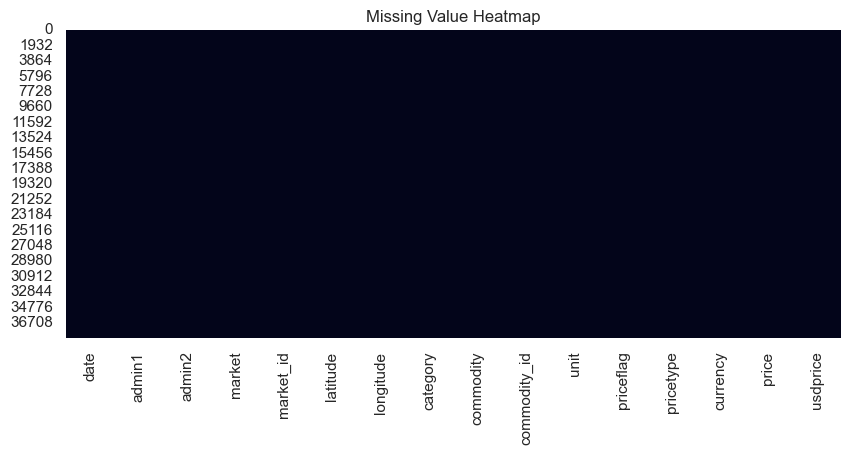

In [7]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


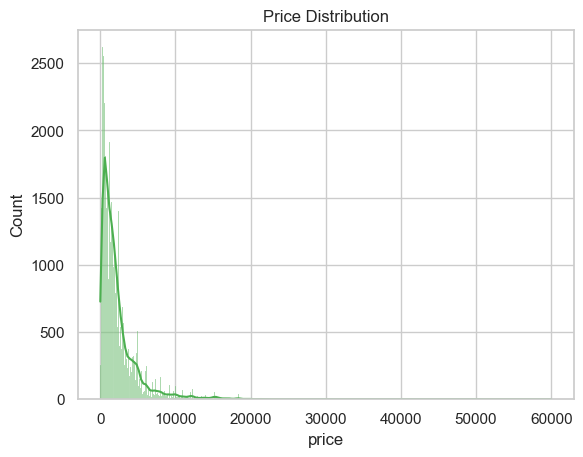

In [8]:
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()


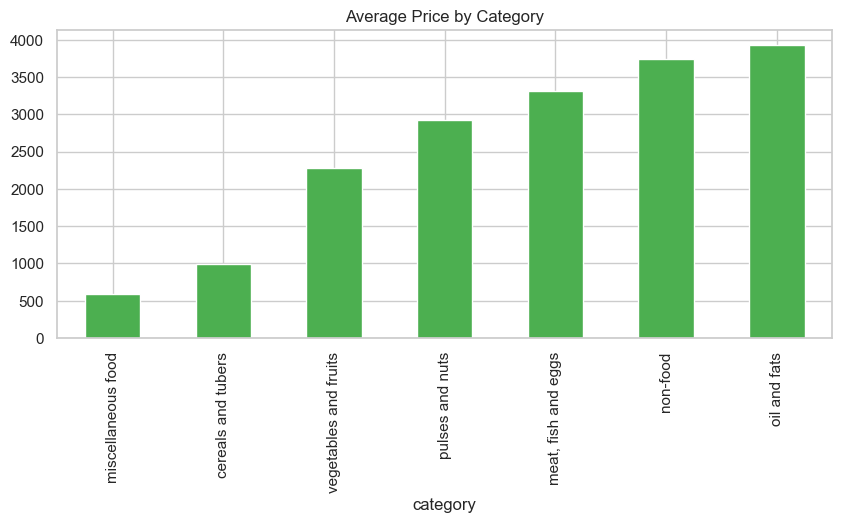

In [9]:
cat_avg = df.groupby('category')['price'].mean().sort_values()
cat_avg.plot(kind='bar', figsize=(10,4))
plt.title("Average Price by Category")
plt.show()


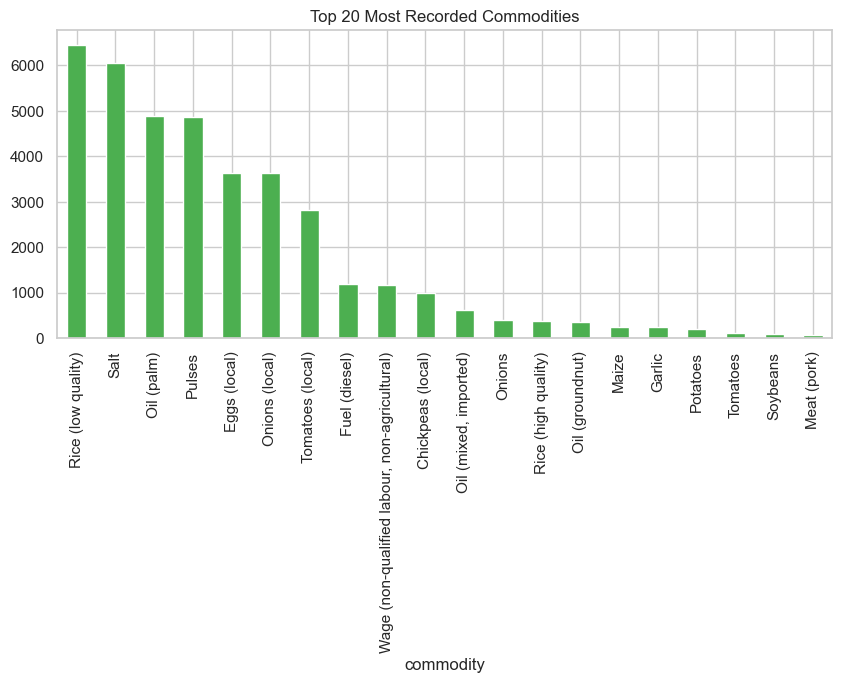

In [10]:
df['commodity'].value_counts().head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Most Recorded Commodities")
plt.show()


In [39]:
df['commodity'].value_counts()

commodity
Rice (low quality)                               6455
Salt                                             6052
Oil (palm)                                       4877
Pulses                                           4869
Eggs (local)                                     3628
Onions (local)                                   3627
Tomatoes (local)                                 2814
Fuel (diesel)                                    1197
Wage (non-qualified labour, non-agricultural)    1175
Chickpeas (local)                                 986
Oil (mixed, imported)                             617
Onions                                            389
Rice (high quality)                               367
Oil (groundnut)                                   352
Maize                                             253
Garlic                                            236
Potatoes                                          207
Tomatoes                                          110
Soybeans          

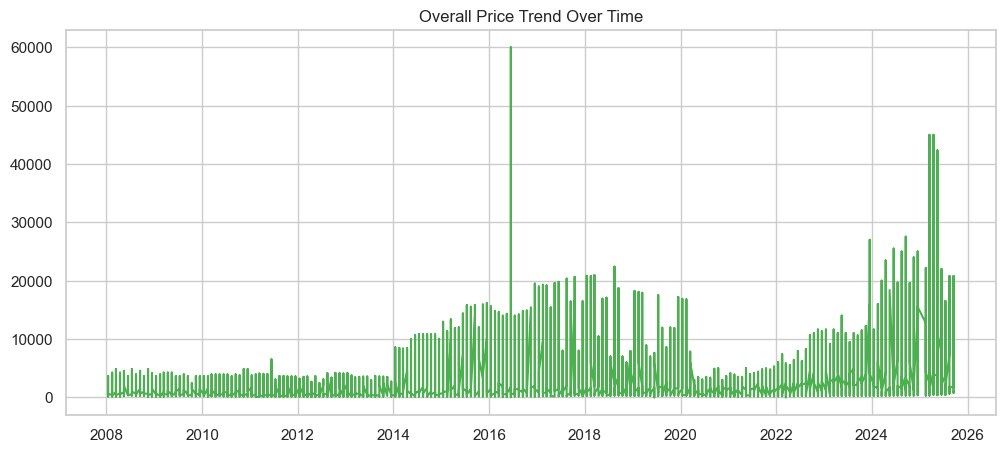

In [11]:
df_sorted = df.sort_values('date')

plt.figure(figsize=(12,5))
plt.plot(df_sorted['date'], df_sorted['price'])
plt.title("Overall Price Trend Over Time")
plt.show()


In [12]:
# plt.figure(figsize=(12,6))
# sns.lineplot(data=df, x='date', y='price', hue='category')
# plt.title("Price Trend by Commodity")
# plt.legend(bbox_to_anchor=(1.05,1))
# plt.show()


In [13]:
# df['MA_30'] = df.groupby('commodity')['price'].transform(lambda x: x.rolling(30).mean())

# sns.lineplot(data=df, x='date', y='MA_30', hue='category')
# plt.title("30-Day Moving Average by Commodity")
# plt.show()


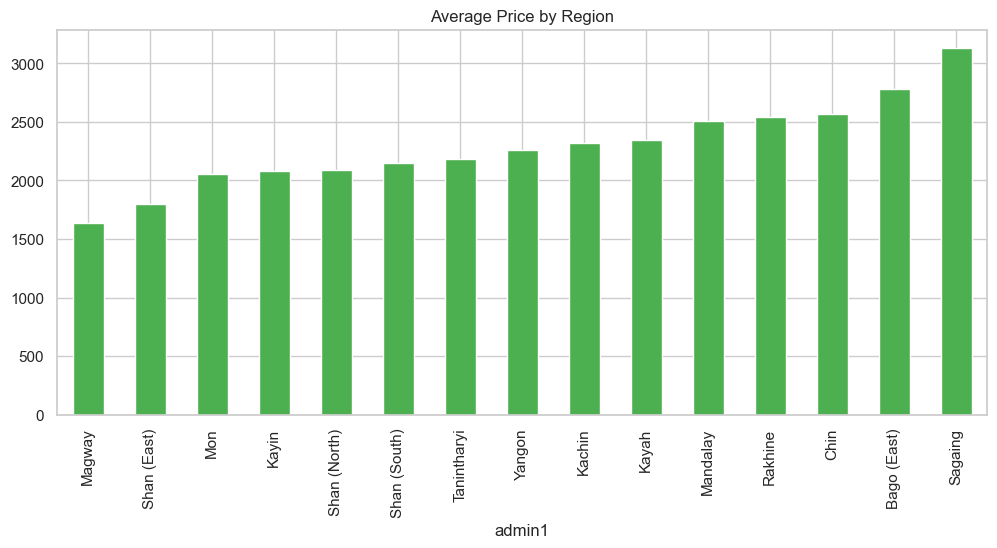

In [14]:
region_avg = df.groupby('admin1')['price'].mean().sort_values()
region_avg.plot(kind='bar', figsize=(12,5))
plt.title("Average Price by Region")
plt.show()


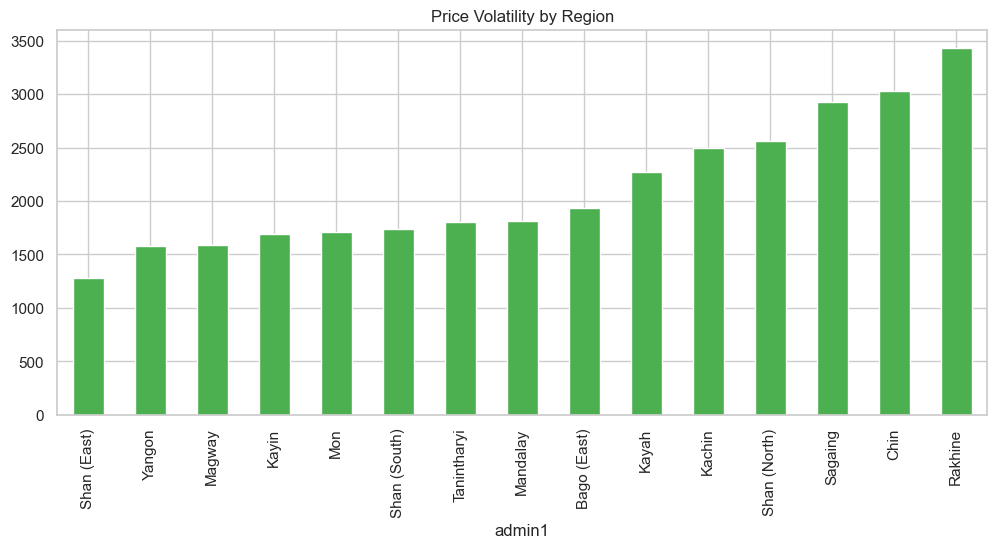

In [15]:
region_std = df.groupby('admin1')['price'].std().sort_values()
region_std.plot(kind='bar', figsize=(12,5))
plt.title("Price Volatility by Region")
plt.show()


              avg_price_before_2021  avg_price_after_2021   difference
admin1                                                                
Chin                    1569.283326           3447.375028  1878.091701
Kachin                  1450.093625           2909.346029  1459.252404
Kayah                   1176.875660           2757.854631  1580.978970
Kayin                   1001.999692           2248.100260  1246.100568
Magway                  1188.944745           2257.789128  1068.844383
Mon                      939.596307           2354.711218  1415.114911
Rakhine                  951.831873           3439.141239  2487.309366
Sagaing                 1403.277780           3798.642838  2395.365058
Shan (East)             1175.009012           2490.076757  1315.067744
Shan (North)            1738.387532           2841.541977  1103.154445


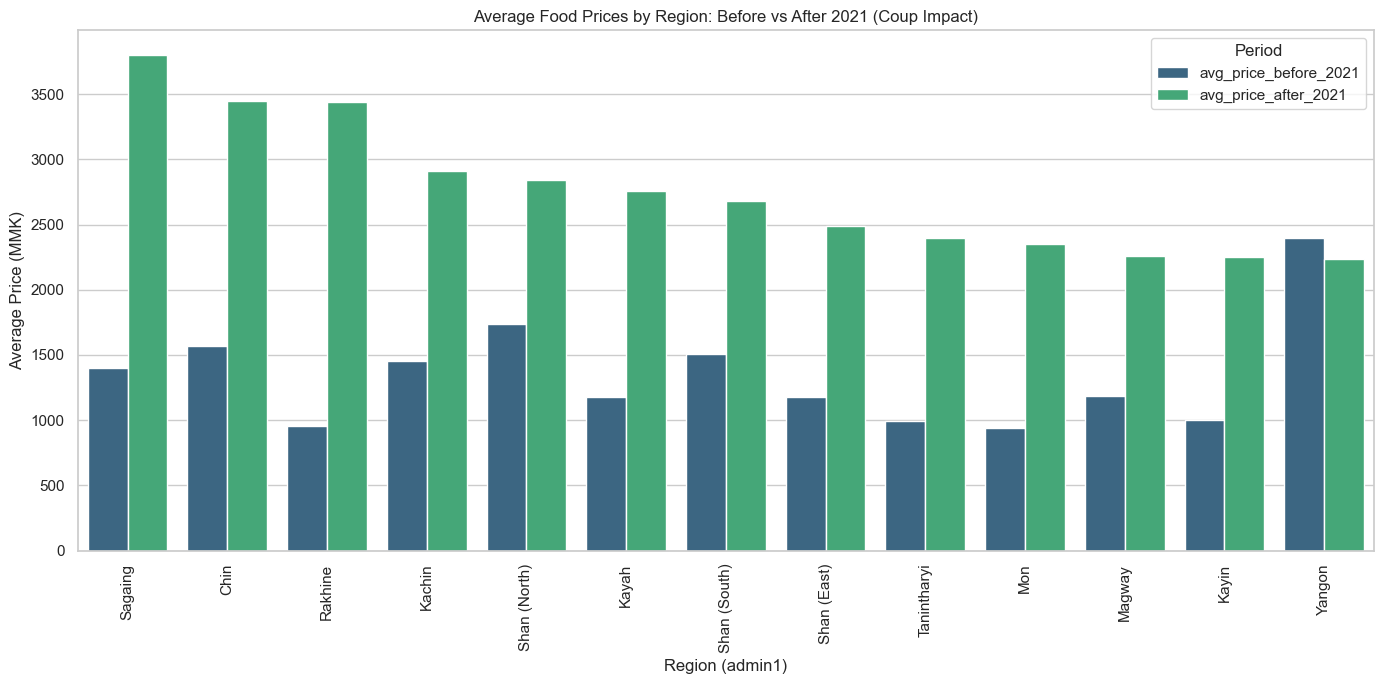

In [ ]:

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Split dataset
df_pre2021 = df[df['date'] < "2021-01-01"]
df_post2021 = df[df['date'] >= "2021-01-01"]

# Compute averages
region_pre = df_pre2021.groupby("admin1")["price"].mean()
region_post = df_post2021.groupby("admin1")["price"].mean()

# Combine into a dataframe
region_compare = pd.DataFrame({
    "avg_price_before_2021": region_pre,
    "avg_price_after_2021": region_post
}).dropna()

# Calculate difference
region_compare["difference"] = region_compare["avg_price_after_2021"] - region_compare["avg_price_before_2021"]

print(region_compare.head(10))

plt.figure(figsize=(14, 7))

region_compare_sorted = region_compare.sort_values("avg_price_after_2021", ascending=False)

# --- Melt for plotting ---
plot_df = region_compare_sorted.reset_index().melt(
    id_vars="admin1",
    value_vars=["avg_price_before_2021", "avg_price_after_2021"],
    var_name="Period",
    value_name="Average Price"
)

# # Set food-themed green palette
# palette = {
#     "avg_price_before_2021": "#7cb342",  # light green
#     "avg_price_after_2021": "#33691e"    # dark green
# }

sns.barplot(
    data=plot_df,
    x="admin1", 
    y="Average Price",
    hue="Period", palette="viridis"
)

plt.xticks(rotation=90)
plt.title("Average Food Prices by Region: Before vs After 2021 (Coup Impact)")
plt.xlabel("Region (admin1)")
plt.ylabel("Average Price (MMK)")
plt.tight_layout()
plt.show()


admin1
Rakhine         2487.309366
Sagaing         2395.365058
Chin            1878.091701
Kayah           1580.978970
Kachin          1459.252404
Mon             1415.114911
Tanintharyi     1405.361650
Shan (East)     1315.067744
Kayin           1246.100568
Shan (South)    1169.489689
Name: price, dtype: float64


C:\Users\nuwai\AppData\Local\Temp\ipykernel_5560\1961574190.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_impact.index, y=top_impact.values, palette="viridis")


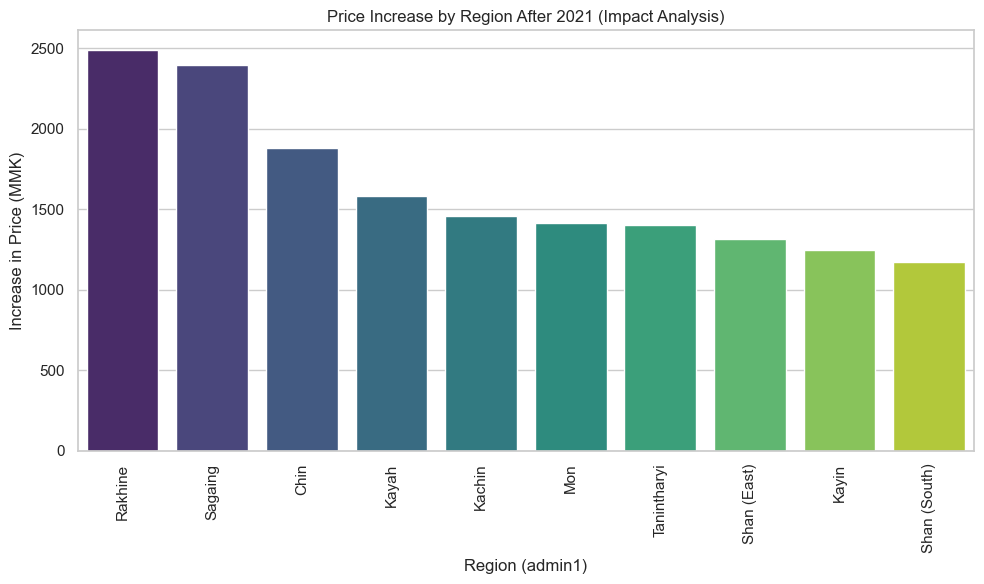

In [17]:
# Create pre-2021 and post-2021 slices
df_pre2021 = df[df['date'] < "2021-01-01"]
df_post2021 = df[df['date'] >= "2021-01-01"]

# Compute regional average prices
region_pre = df_pre2021.groupby("admin1")["price"].mean()
region_post = df_post2021.groupby("admin1")["price"].mean()

# Calculate impact = price increase
impact = (region_post - region_pre).dropna().sort_values(ascending=False)

top_impact = impact.head(10)
print(top_impact)   # Top affected regions

# --- Visualization ---
plt.figure(figsize=(10,6))
sns.barplot(x=top_impact.index, y=top_impact.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Price Increase by Region After 2021 (Impact Analysis)")
plt.ylabel("Increase in Price (MMK)")
plt.xlabel("Region (admin1)")
plt.tight_layout()
plt.show()


In [40]:
# Split dataset
df_pre2021 = df[df['year'] < 2021]
df_post2021 = df[df['year'] >= 2021]

# Compute average price per commodity before and after 2021
avg_pre = df_pre2021.groupby('commodity')['price'].mean()
avg_post = df_post2021.groupby('commodity')['price'].mean()

# Compute % change
price_change = ((avg_post - avg_pre)/avg_pre * 100).sort_values(ascending=False)
print(price_change.head(10))  # top 10 commodities with highest surge


commodity
Oil (palm)            238.197899
Pulses                214.568872
Rice (low quality)    198.572117
Onions (local)        196.906198
Eggs (local)          153.161817
Salt                  108.098578
Tomatoes (local)       66.462467
Chickpeas                    NaN
Chickpeas (local)            NaN
Fuel (diesel)                NaN
Name: price, dtype: float64


C:\Users\nuwai\AppData\Local\Temp\ipykernel_5560\3476957511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='pct_change', y='commodity', palette='magma')


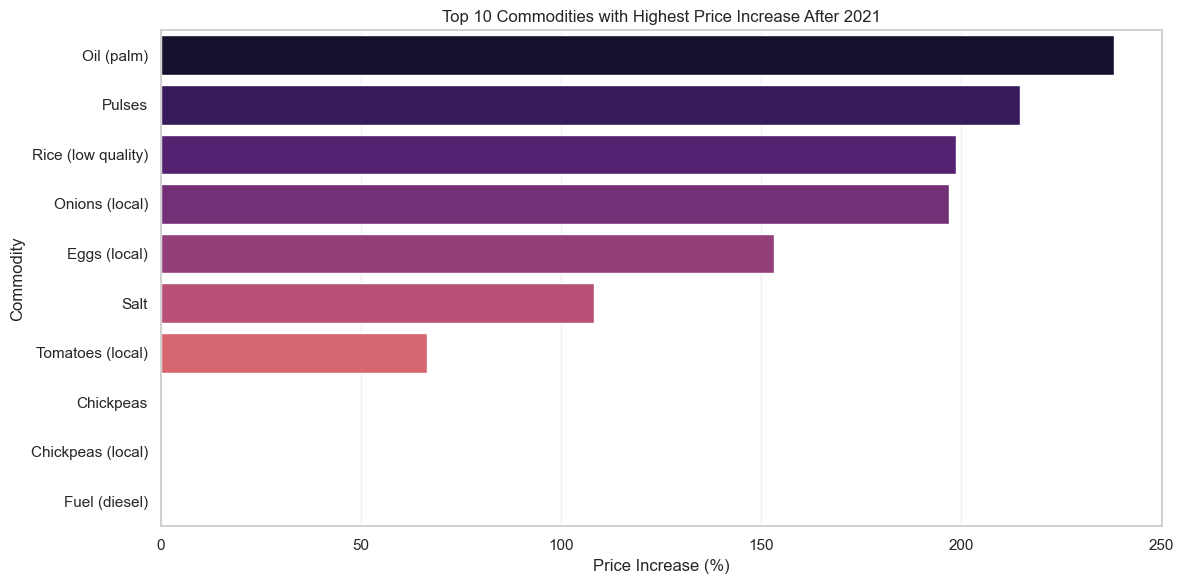

In [41]:

# Select top 10 commodities with highest % change
top10 = price_change.head(10).reset_index()
top10.columns = ['commodity', 'pct_change']

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='pct_change', y='commodity', palette='magma')

plt.xlabel('Price Increase (%)')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities with Highest Price Increase After 2021')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


             commodity  avg_pct_change
0               Garlic       58.845046
1       Onions (local)       51.501242
2             Tomatoes       47.559473
3         Eggs (local)       39.013194
4  Rice (high quality)       31.127378
5     Tomatoes (local)       24.225754
6               Pulses       23.981493
7             Potatoes       23.977431
8             Soybeans       22.636268
9                Maize       22.576066


C:\Users\nuwai\AppData\Local\Temp\ipykernel_5560\3573848890.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_change, x='avg_pct_change', y='commodity', palette='plasma')


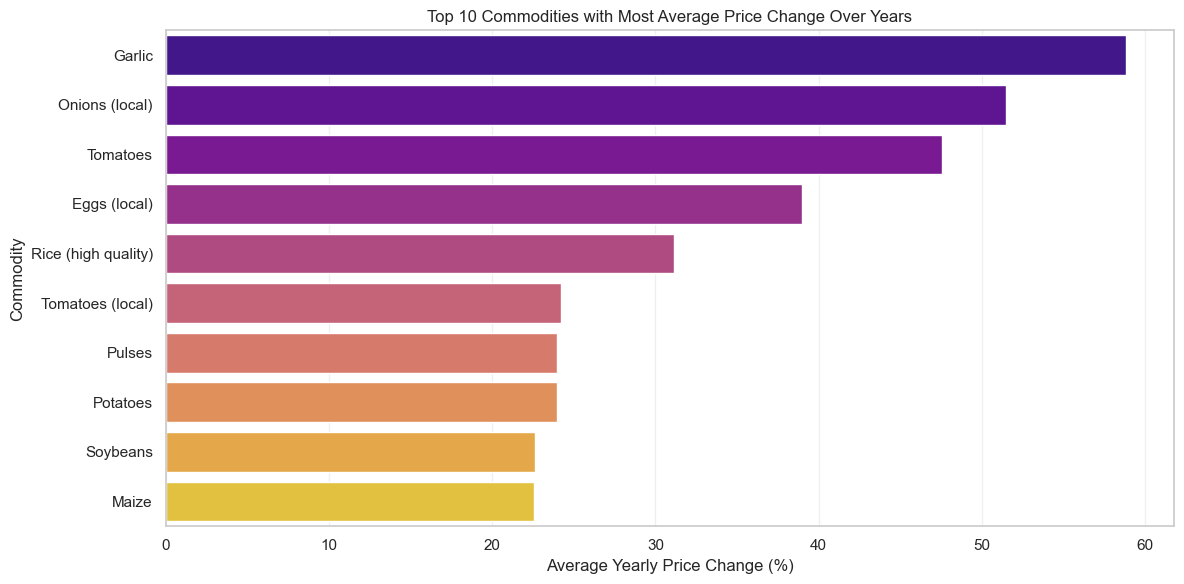

In [42]:
# Compute average price per commodity per year
commodity_year = df.groupby(['commodity', 'year'])['price'].mean().reset_index()
commodity_year['pct_change'] = commodity_year.groupby('commodity')['price'].pct_change() * 100
avg_change = commodity_year.groupby('commodity')['pct_change'].apply(lambda x: x.abs().mean()).sort_values(ascending=False)
top_change = avg_change.head(10).reset_index()
top_change.columns = ['commodity', 'avg_pct_change']
print(top_change)
plt.figure(figsize=(12,6))
sns.barplot(data=top_change, x='avg_pct_change', y='commodity', palette='plasma')

plt.xlabel('Average Yearly Price Change (%)')
plt.ylabel('Commodity')
plt.title('Top 10 Commodities with Most Average Price Change Over Years')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


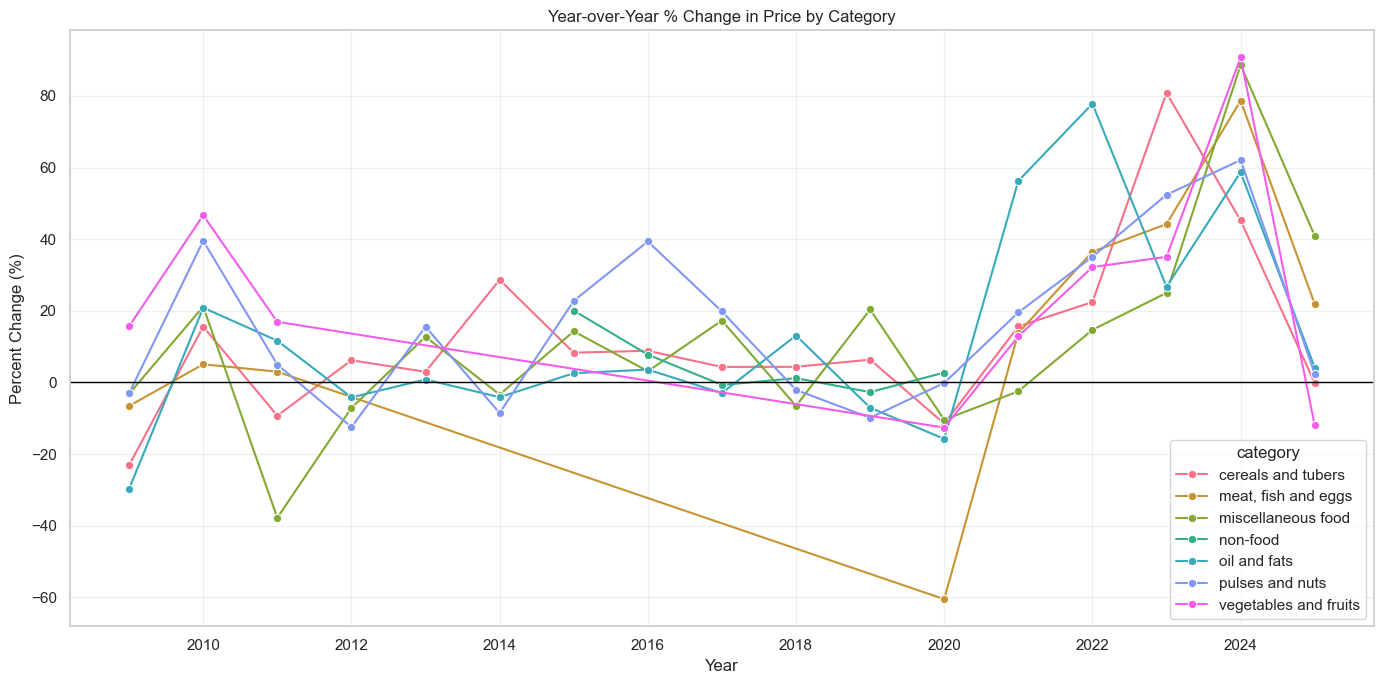

In [ ]:

# Ensure correct datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

category_year = df.groupby(["category", "year"])["price"].mean().reset_index()
category_year["pct_change"] = category_year.groupby("category")["price"].pct_change() * 100

plt.figure(figsize=(14, 7))

sns.lineplot(
    data=category_year,
    x="year",
    y="pct_change",
    hue="category",
    marker="o"
)

plt.axhline(0, color="black", linewidth=1)
plt.title("Year-over-Year % Change in Price by Category")
plt.ylabel("Percent Change (%)")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



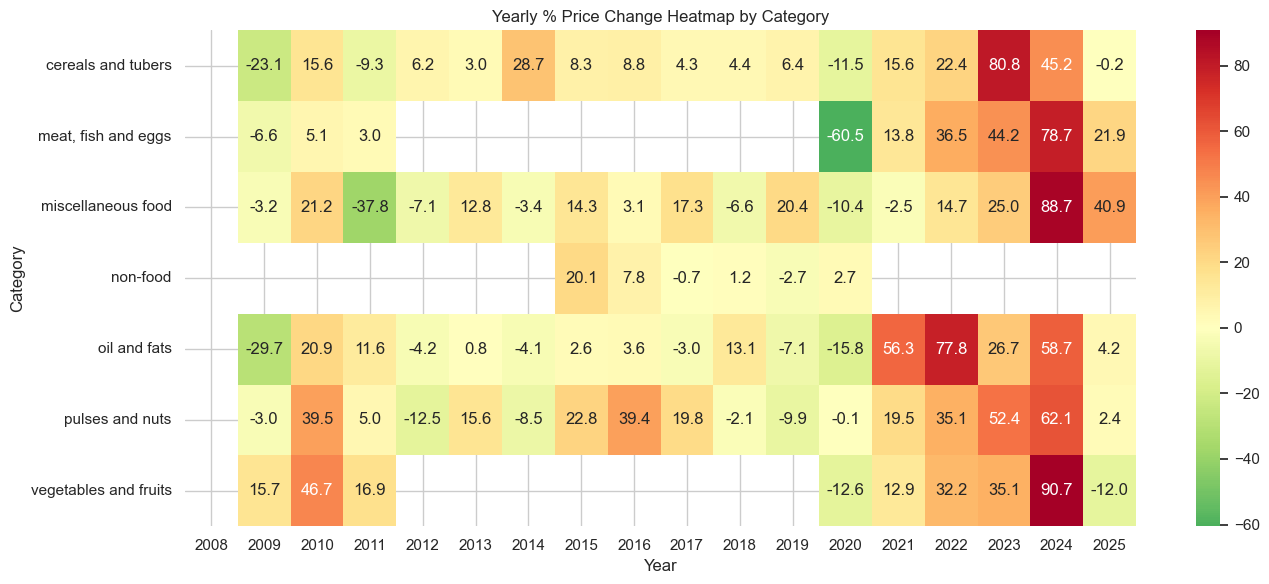

In [31]:
heat_df = category_year.pivot(index="category", columns="year", values="pct_change")

plt.figure(figsize=(14, 6))
sns.heatmap(heat_df, annot=True, fmt=".1f", cmap="RdYlGn_r", center=0)
plt.title("Yearly % Price Change Heatmap by Category")
plt.xlabel("Year")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [34]:
# # Ensure correct datetime
# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df['year'] = df['date'].dt.year

# # Compute yearly average price and YoY % change
# category_year = df.groupby(["category", "year"])["price"].mean().reset_index()
# category_year["pct_change"] = category_year.groupby("category")["price"].pct_change() * 100

# # Pick top categories by overall average price change
# top_categories = category_year.groupby("category")["pct_change"].mean().abs().sort_values(ascending=False).head(5).index
# category_year_top = category_year[category_year["category"].isin(top_categories)]

# plt.figure(figsize=(12, 6))
# sns.lineplot(
#     data=category_year_top,
#     x="year",
#     y="pct_change",
#     hue="category",
#     marker="o"
# )

# plt.axhline(0, color="black", linewidth=1)
# plt.title("YoY % Change in Price for Top Categories")
# plt.ylabel("Percent Change (%)")
# plt.xlabel("Year")
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


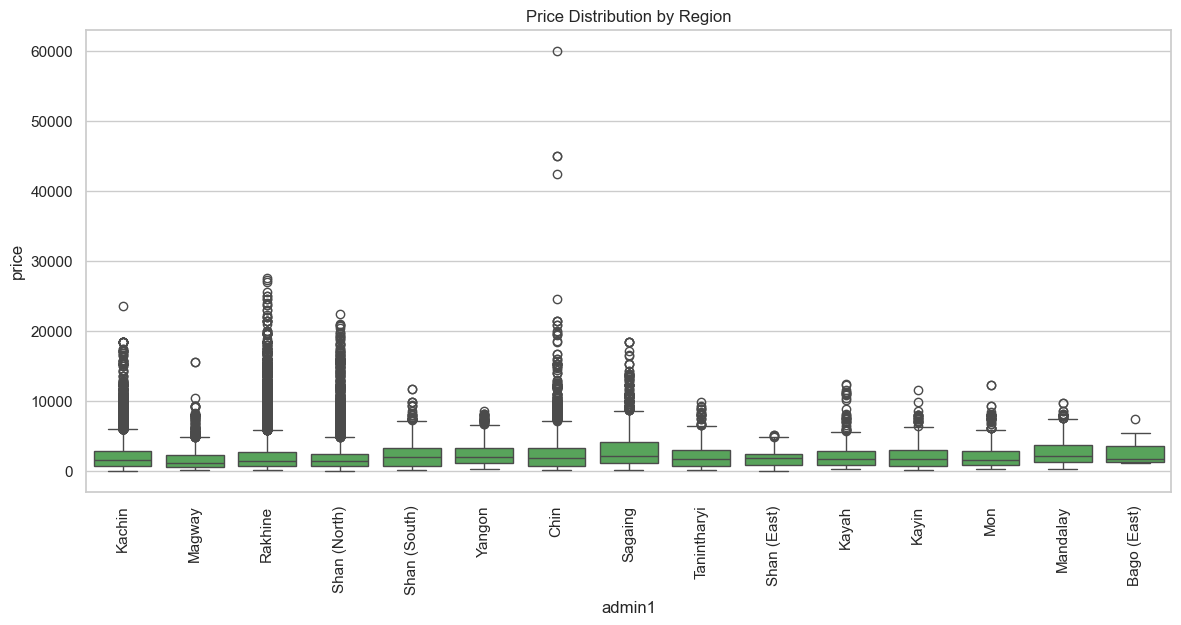

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='admin1', y='price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Region")
plt.show()


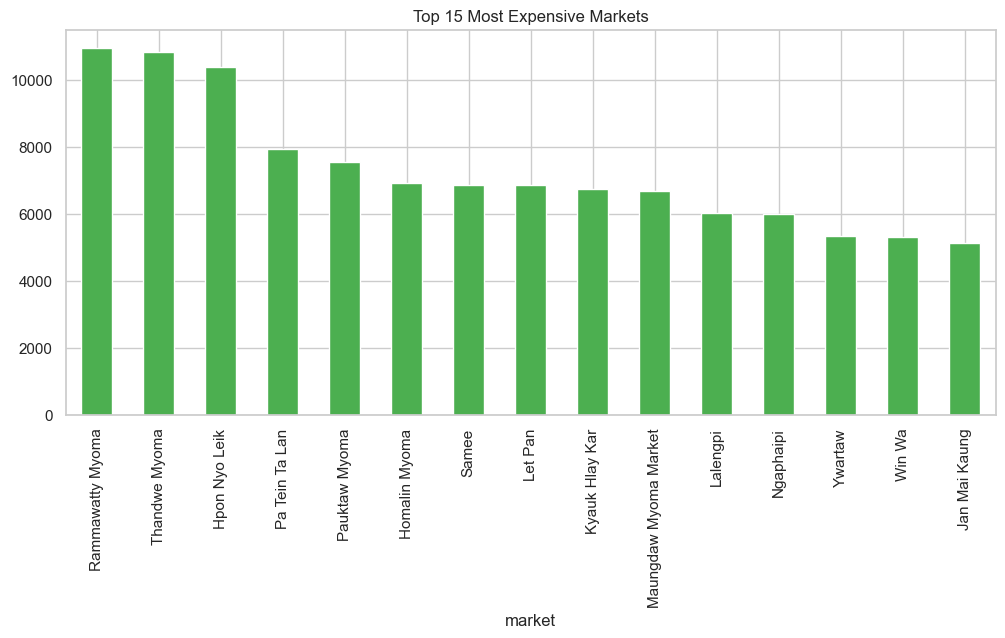

In [19]:
market_avg = df.groupby('market')['price'].mean().sort_values(ascending=False).head(15)
market_avg.plot(kind='bar', figsize=(12,5))
plt.title("Top 15 Most Expensive Markets")
plt.show()


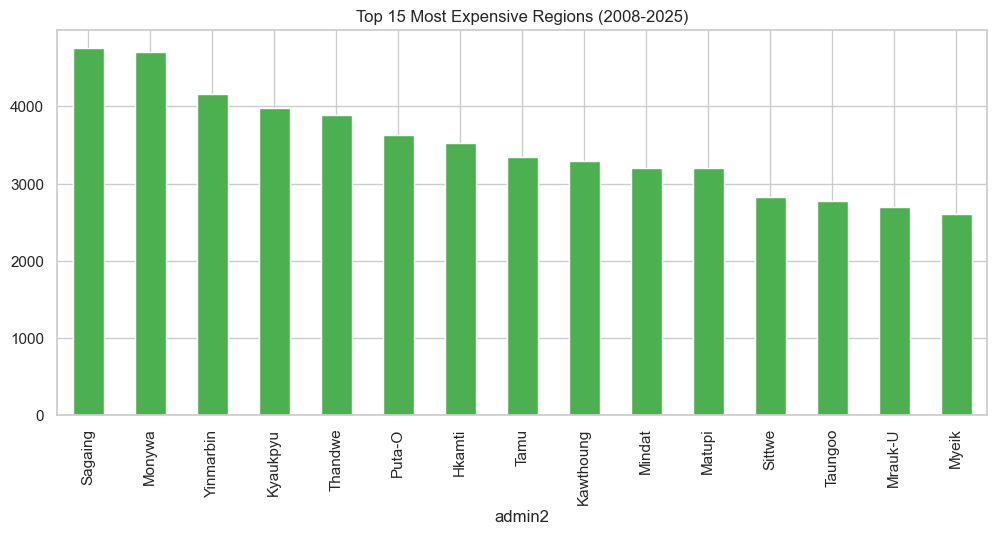

In [20]:
market_avg = df.groupby('admin2')['price'].mean().sort_values(ascending=False).head(15)
market_avg.plot(kind='bar', figsize=(12,5))
plt.title("Top 15 Most Expensive Regions (2008-2025)")
plt.show()

In [21]:
# pivot = df.pivot_table(values='price', index='market', columns='commodity', aggfunc='mean')

# plt.figure(figsize=(16,8))
# sns.heatmap(pivot, cmap="YlGnBu")
# plt.title("Average Price Heatmap (Market × Commodity)")
# plt.show()


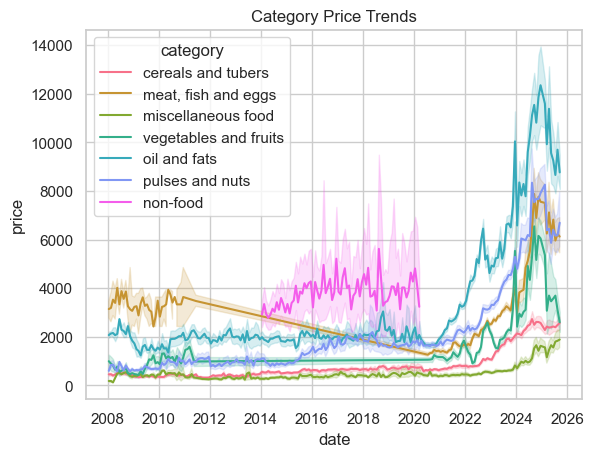

In [22]:
sns.lineplot(data=df, x='date', y='price', hue='category')
plt.title("Category Price Trends")
plt.show()


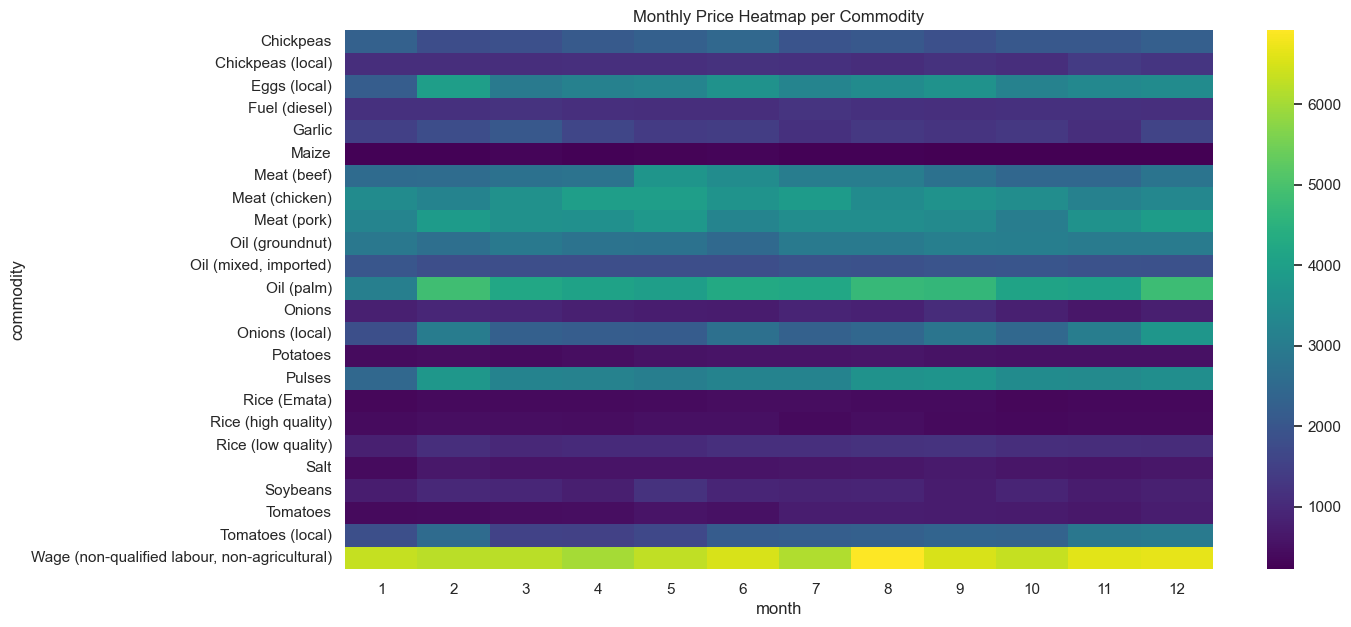

In [23]:
df['month'] = df['date'].dt.month

monthly_trend = df.groupby(['commodity','month'])['price'].mean().unstack()

plt.figure(figsize=(14,7))
sns.heatmap(monthly_trend, cmap="viridis")
plt.title("Monthly Price Heatmap per Commodity")
plt.show()


In [24]:
commodity_vol = df.groupby('commodity')['price'].std().sort_values(ascending=False)
commodity_vol.head(15)


commodity
Wage (non-qualified labour, non-agricultural)    3739.580450
Oil (palm)                                       3482.995718
Onions (local)                                   3271.990734
Pulses                                           2640.291754
Eggs (local)                                     2516.278479
Tomatoes (local)                                 1964.906181
Oil (groundnut)                                   954.883855
Garlic                                            879.421319
Rice (low quality)                                822.263882
Meat (pork)                                       795.532802
Meat (beef)                                       739.629921
Meat (chicken)                                    673.758551
Chickpeas                                         647.145020
Chickpeas (local)                                 632.313474
Salt                                              596.454225
Name: price, dtype: float64

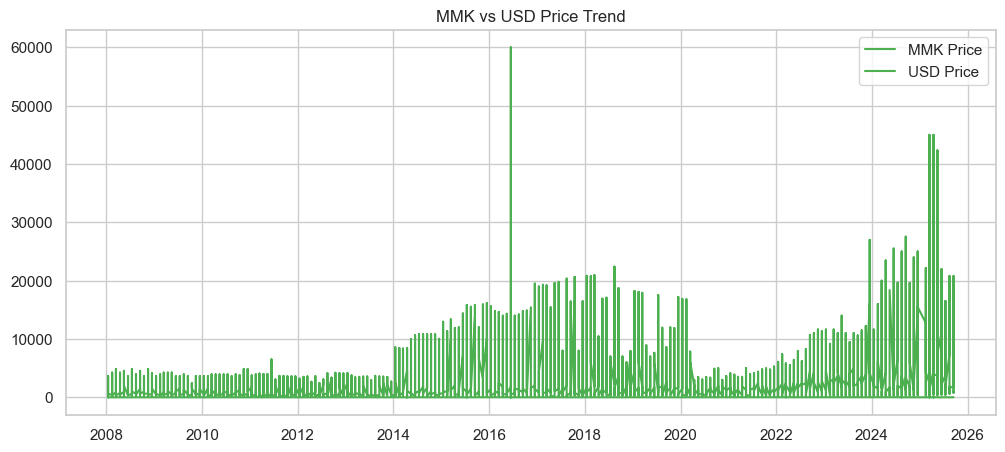

In [25]:
plt.figure(figsize=(12,5))
plt.plot(df_sorted['date'], df_sorted['price'], label="MMK Price")
plt.plot(df_sorted['date'], df_sorted['usdprice'], label="USD Price")
plt.legend()
plt.title("MMK vs USD Price Trend")
plt.show()


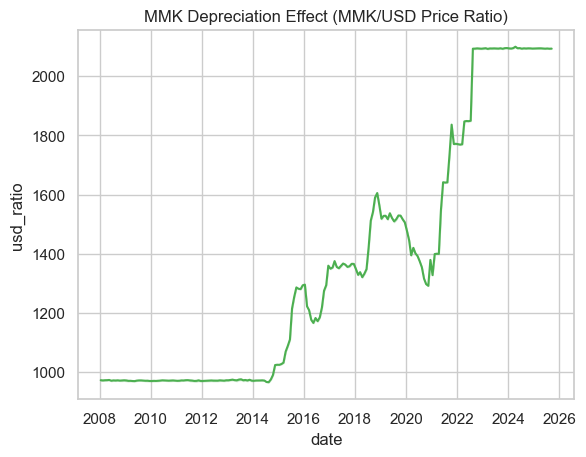

In [26]:
df['usd_ratio'] = df['price'] / df['usdprice']

sns.lineplot(data=df, x='date', y='usd_ratio')
plt.title("MMK Depreciation Effect (MMK/USD Price Ratio)")
plt.show()


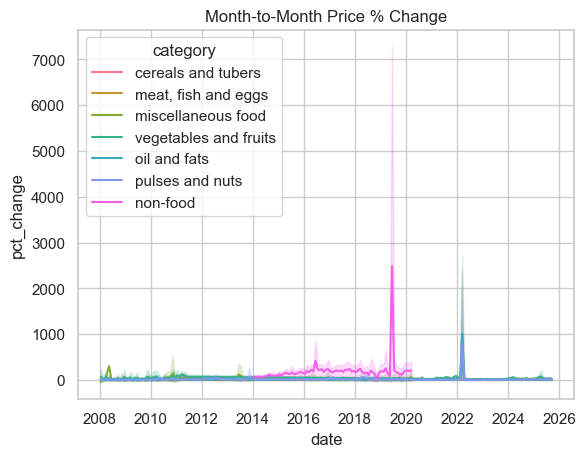

In [27]:
df['pct_change'] = df.groupby('category')['price'].pct_change() * 100

sns.lineplot(data=df, x='date', y='pct_change', hue='category')
plt.title("Month-to-Month Price % Change")
plt.show()


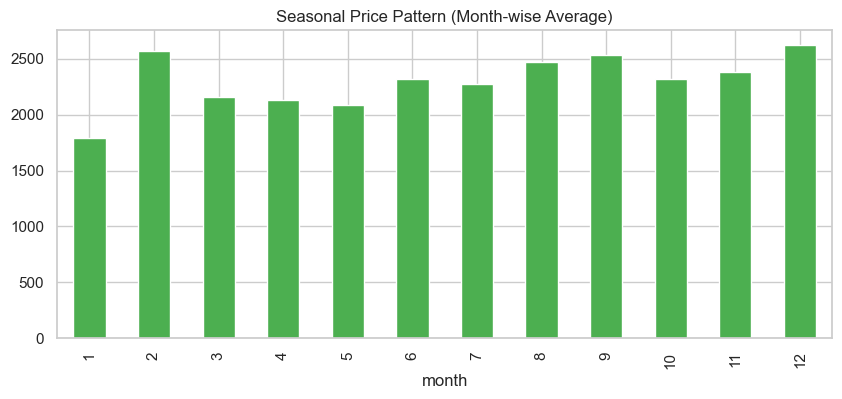

In [28]:
month_avg = df.groupby('month')['price'].mean()
month_avg.plot(kind='bar', figsize=(10,4))
plt.title("Seasonal Price Pattern (Month-wise Average)")
plt.show()


In [29]:
df.to_csv("clean_wfp_food_prices.csv", index=False)


In [8]:
# Select rice commodity
rice_name = "Rice (low quality)"

rice_df = df[df["commodity"] == rice_name].copy()
# Group by state (admin1) and year
rice_df["year"] = rice_df["date"].dt.year

year_state_avg = (
    rice_df.groupby(["year", "admin1"])["price"]
    .mean()
    .reset_index()
)

year_state_avg.head()


,year,admin1,price
0,2008,Kachin,570.833333
1,2008,Magway,711.833500
2,2008,Rakhine,411.445783
3,2008,Shan (North),490.326792
4,2008,Shan (South),330.000000


In [20]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# g = sns.FacetGrid(year_state_avg, col="admin1", col_wrap=4, height=3.5, sharey=False)
# g.map_dataframe(sns.lineplot, x="year", y="price", marker="o")
# g.set_titles("{col_name}")
# g.set_axis_labels("Year", "Price (MMK)")

# plt.subplots_adjust(top=0.9)
# g.fig.suptitle(f"Average {rice_name} Price by State by Year")
# plt.show()


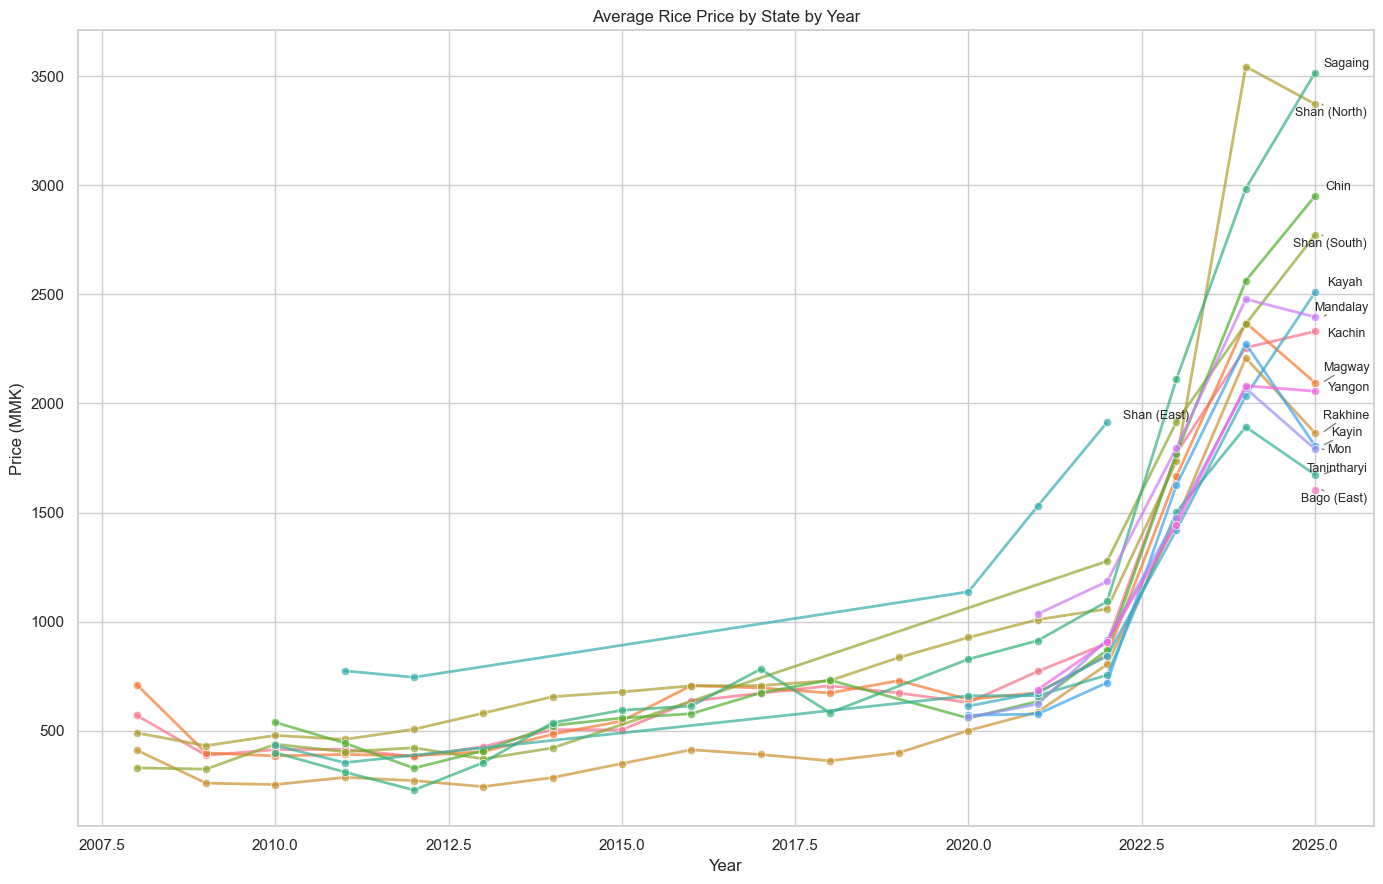

In [19]:
from adjustText import adjust_text

plt.figure(figsize=(14, 9))

sns.lineplot(
    data=year_state_avg,
    x="year",
    y="price",
    hue="admin1",
    linewidth=2,
    alpha=0.7,
    legend=False,
     marker="o"
)

texts = []
for state in year_state_avg["admin1"].unique():
    sub = year_state_avg[year_state_avg["admin1"] == state]
    x = sub["year"].iloc[-1]
    y = sub["price"].iloc[-1]
    texts.append(plt.text(x + 0.1, y, state, fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))

plt.title("Average Rice Price by State by Year")
plt.xlabel("Year")
plt.ylabel("Price (MMK)")
plt.tight_layout()
plt.show()


In [23]:
monthly = (
    rice_df.groupby([pd.Grouper(key="date", freq="M"), "admin1"])["price"]
    .mean()
    .reset_index()
    .sort_values(["admin1", "date"])
)
monthly["pct_change"] = (
    monthly.groupby("admin1")["price"]
    .pct_change()
)
shocks = monthly[
    (monthly["pct_change"] > 0.20) | (monthly["pct_change"] < -0.20)
]
# Add year
shocks["year"] = shocks["date"].dt.year
shocks.head()
shock_count = (
    shocks.groupby("admin1")["pct_change"]
    .count()
    .rename("shock_events")
    .reset_index()
    .sort_values("shock_events", ascending=False)
)

print("=== States Most Vulnerable to Rice Price Shocks ===")
print(shock_count)


=== States Most Vulnerable to Rice Price Shocks ===
          admin1  shock_events
10  Shan (North)            28
4         Magway            27
0           Chin            23
11  Shan (South)            20
1         Kachin            15
8        Sagaing            12
7        Rakhine            11
9    Shan (East)             7
12   Tanintharyi             7
3          Kayin             6
2          Kayah             5
6            Mon             4
5       Mandalay             3


C:\Users\nuwai\AppData\Local\Temp\ipykernel_11568\3735475487.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rice_df.groupby([pd.Grouper(key="date", freq="M"), "admin1"])["price"]
C:\Users\nuwai\AppData\Local\Temp\ipykernel_11568\3735475487.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shocks["year"] = shocks["date"].dt.year


C:\Users\nuwai\AppData\Local\Temp\ipykernel_11568\203590721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


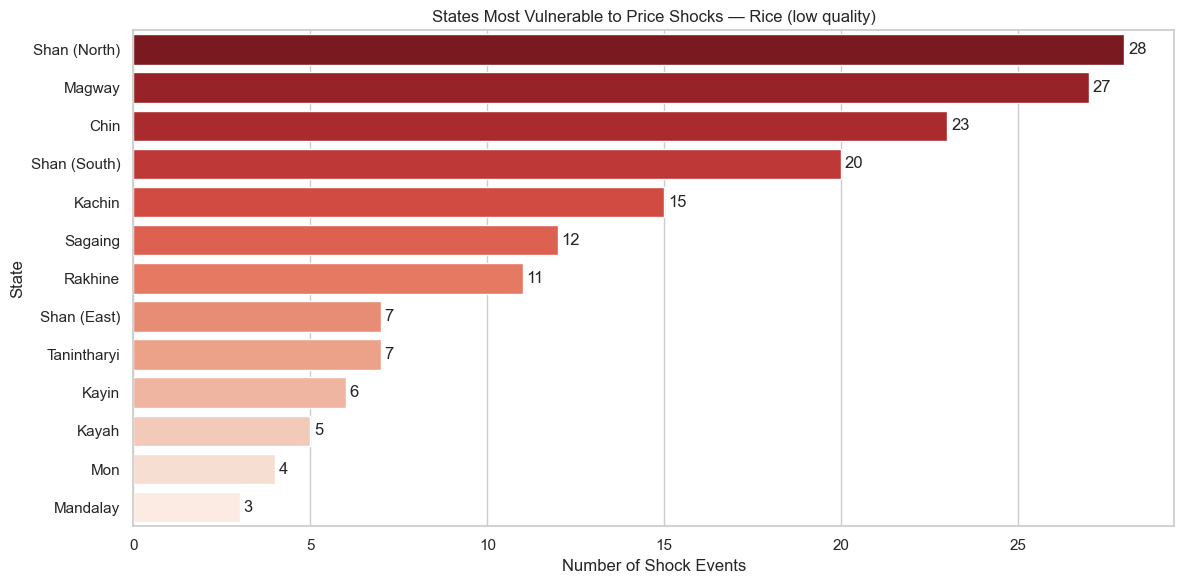

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=shock_count,
    x="shock_events",
    y="admin1",
    palette="Reds_r"
)

plt.title(f"States Most Vulnerable to Price Shocks — {rice_name}")
plt.xlabel("Number of Shock Events")
plt.ylabel("State")

for i, v in enumerate(shock_count["shock_events"]):
    plt.text(v + 0.1, i, str(v), va="center")

plt.tight_layout()
plt.show()


In [24]:
shock_by_year = (
    shocks.groupby(["admin1", "year"])["pct_change"]
    .count()
    .reset_index()
    .rename(columns={"pct_change": "shock_events"})
)

print("=== SHOCK EVENTS BY STATE AND YEAR ===")
print(shock_by_year)


=== SHOCK EVENTS BY STATE AND YEAR ===
         admin1  year  shock_events
0          Chin  2010             2
1          Chin  2011             3
2          Chin  2012             6
3          Chin  2015             2
4          Chin  2016             2
..          ...   ...           ...
83  Tanintharyi  2011             1
84  Tanintharyi  2020             2
85  Tanintharyi  2023             2
86  Tanintharyi  2024             1
87  Tanintharyi  2025             1

[88 rows x 3 columns]


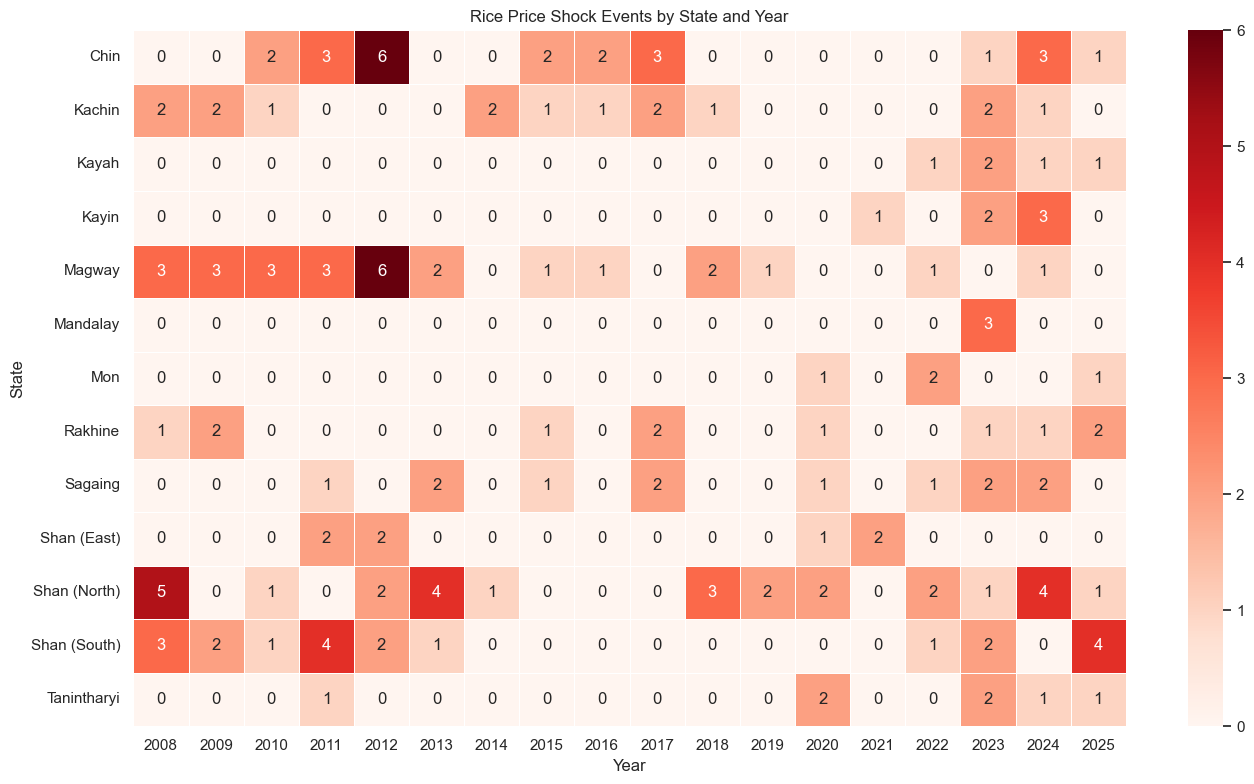

In [25]:
pivot = shock_by_year.pivot(index="admin1", columns="year", values="shock_events").fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".0f", linewidths=.5)

plt.title("Rice Price Shock Events by State and Year")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Mandalay Rice Prices in 2025'}, xlabel='date'>

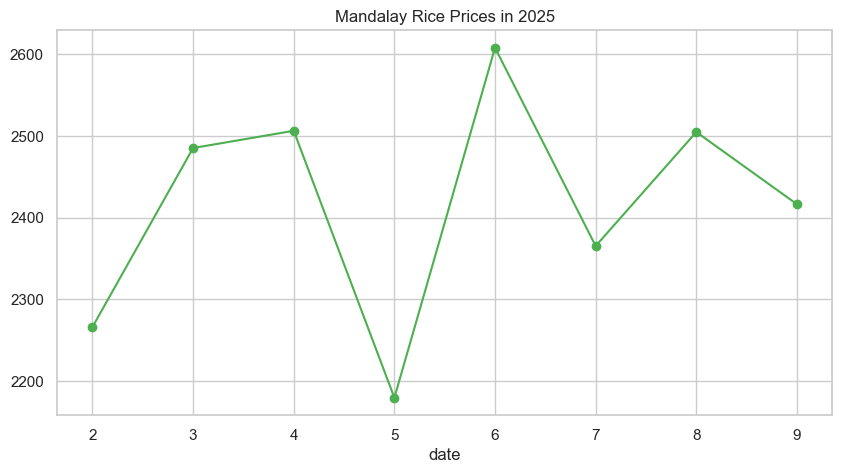

In [28]:
mandalay_2025 = df[
    (df["admin1"] == "Mandalay") &
    (df["commodity"] == "Rice (low quality)") &
    (df["date"].dt.year == 2025)
].copy()


mand_month = mandalay_2025.groupby(mandalay_2025.date.dt.month)["price"].mean()
mand_month.plot(kind='line', marker='o', figsize=(10,5), title="Mandalay Rice Prices in 2025")


<Axes: xlabel='date'>

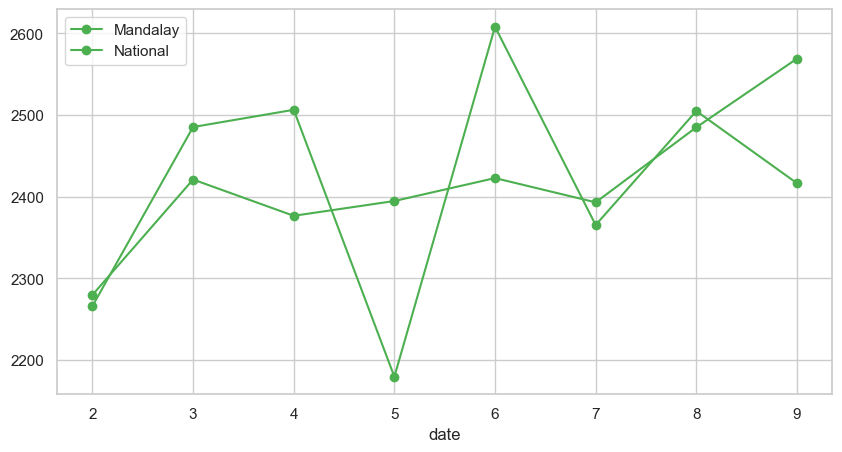

In [31]:
national_2025 = df[
    (df["commodity"] == "Rice (low quality)") &
    (df["date"].dt.year == 2025)
].groupby(df.date.dt.month)["price"].mean()

comparison = pd.DataFrame({
    "Mandalay": mand_month,
    "National": national_2025
})
comparison.plot(marker='o', figsize=(10,5))


<Axes: title={'center': 'Mandalay Rice Monthly % Change (2025)'}, xlabel='date'>

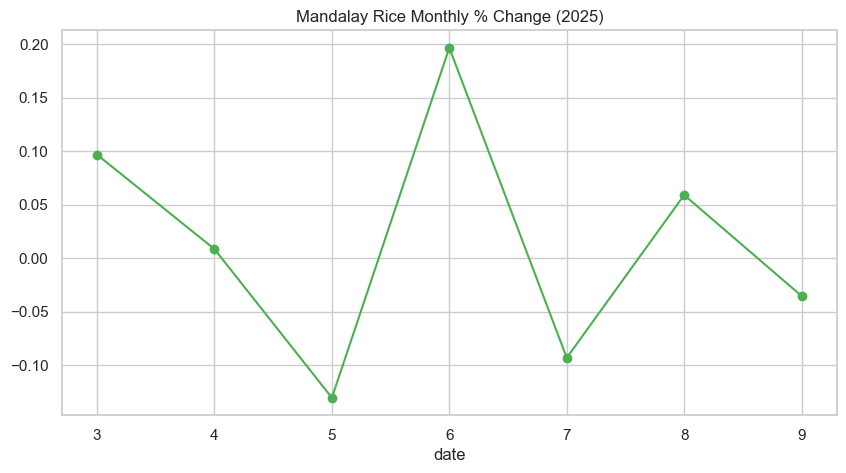

In [32]:
mand_month.pct_change().plot(marker='o', figsize=(10,5), title="Mandalay Rice Monthly % Change (2025)")


In [33]:
earthquake_month = 3  # example: April

pre_eq = mand_month[mand_month.index < earthquake_month].mean()
post_eq = mand_month[mand_month.index > earthquake_month].mean()

print("Pre-quake avg price:", pre_eq)
print("Post-quake avg price:", post_eq)
print("Percent increase:", (post_eq - pre_eq) / pre_eq * 100)


Pre-quake avg price: 2265.991666666667
Post-quake avg price: 2430.165555555556
Percent increase: 7.245123241357418
